<a href="https://colab.research.google.com/github/Akshith1704/Python-Practice/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn

Customer churn refers to the loss of clients or subscribers for a business. It's a critical metric that impacts revenue and growth, prompting companies to analyze patterns and implement retention strategies. Reducing churn involves improving customer satisfaction, offering better support, and understanding customer needs.

By studying customer churn, businesses can create strategies to keep their customers happy, improve satisfaction, and increase profits.

The churn rate is the percentage of customers who leave a service during a specific time frame.


IMPORT AS ALL NECESSARY LIBRARIES




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA


In [6]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

STUDY DATA


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


NULL VALUES

In [ ]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There is no null value in the file.


In [ ]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
print(int_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].isnull().sum())

0


OUTLIERS

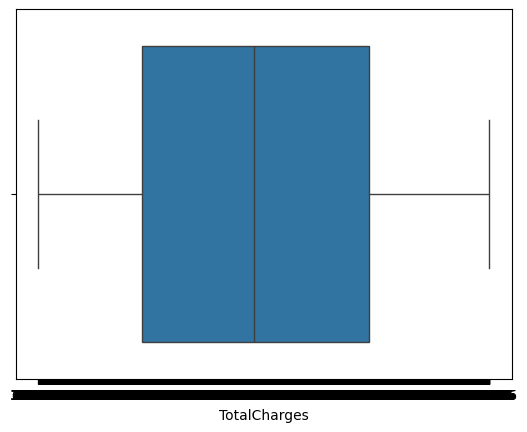

In [ ]:
sns.boxplot(x=df['TotalCharges'])
plt.show()

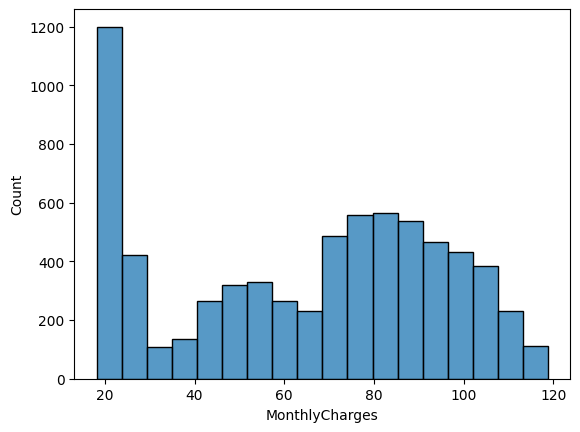

In [ ]:
sns.histplot(df['MonthlyCharges'])
plt.show()


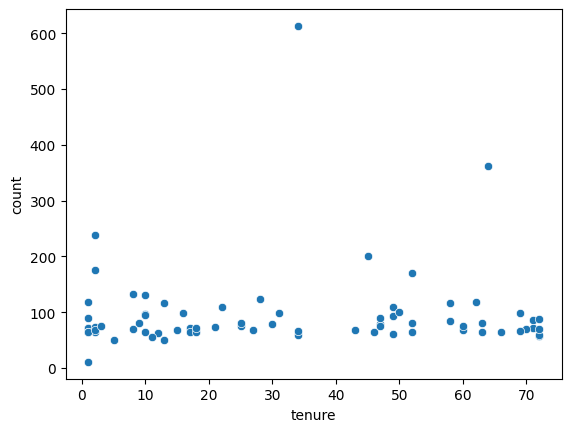

In [ ]:
sns.scatterplot(x=df['tenure'], y=df['tenure'].value_counts())
plt.show()

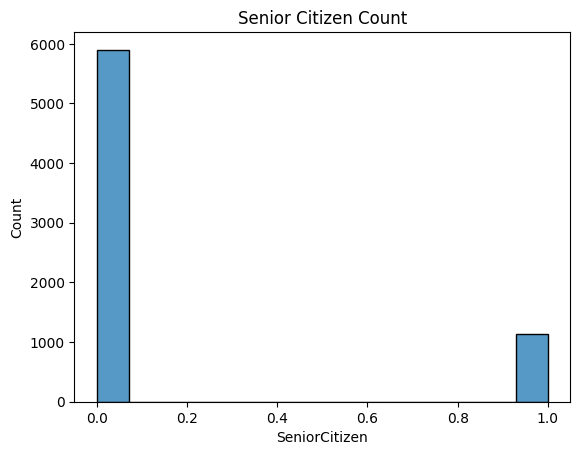

In [ ]:
sns.histplot(df['SeniorCitizen'])
plt.title('Senior Citizen Count')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

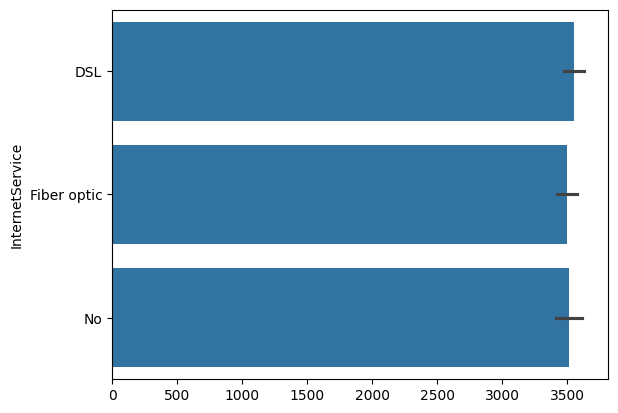

In [ ]:
sns.barplot(df['InternetService'])
plt.show

ANALYSIS

UNIVARIATE ANALYSIS

Univariate analysis involves examining and analyzing a single variable to understand its distribution, central tendency, and variability.

In [ ]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


CONTRACT COLUMN ANALYSIS


Contract column analysis involves examining contractual data to identify patterns, trends, and insights related to contract terms, durations, and compliance.


In [ ]:
contract_count = df['Contract'].value_counts()
print(contract_count)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


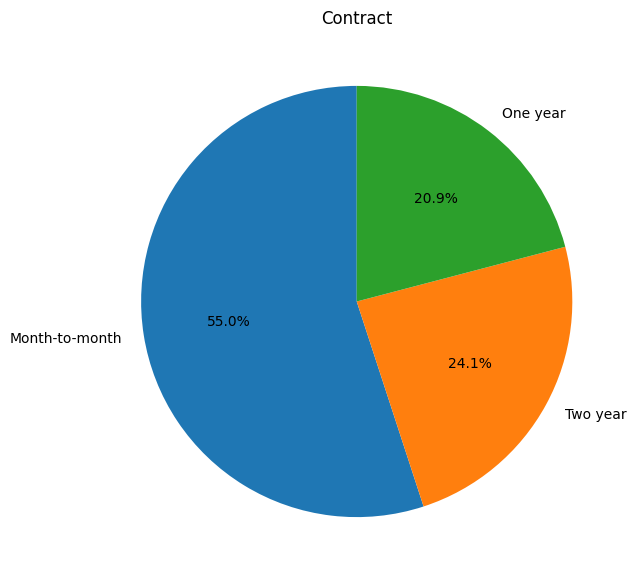

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Contract')
plt.show()

Conclusion

From the pie chart, we can say that Month-to-month is the popular contract and followed by Two year contract and one year contract.

In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
summary_statistics = df[numerical_columns].describe()
print("Summary Statistics for Numerical Variables:")
print(summary_statistics)

Summary Statistics for Numerical Variables:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


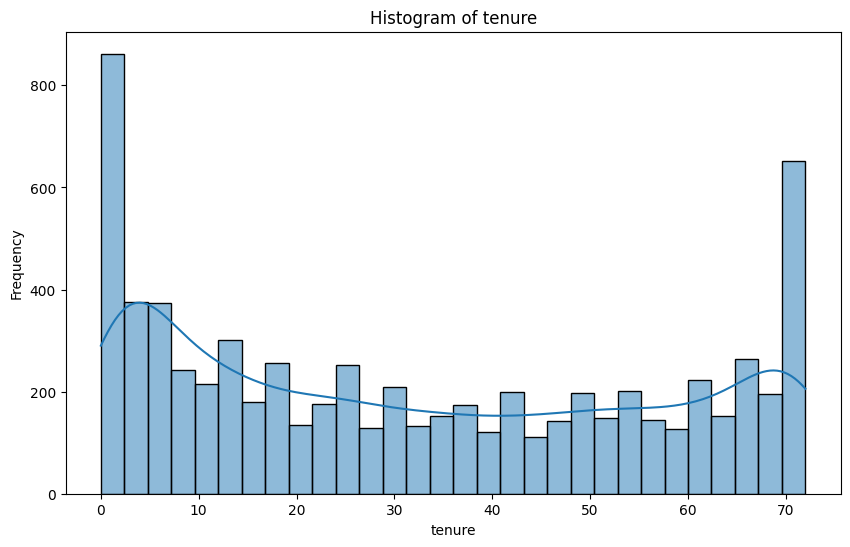

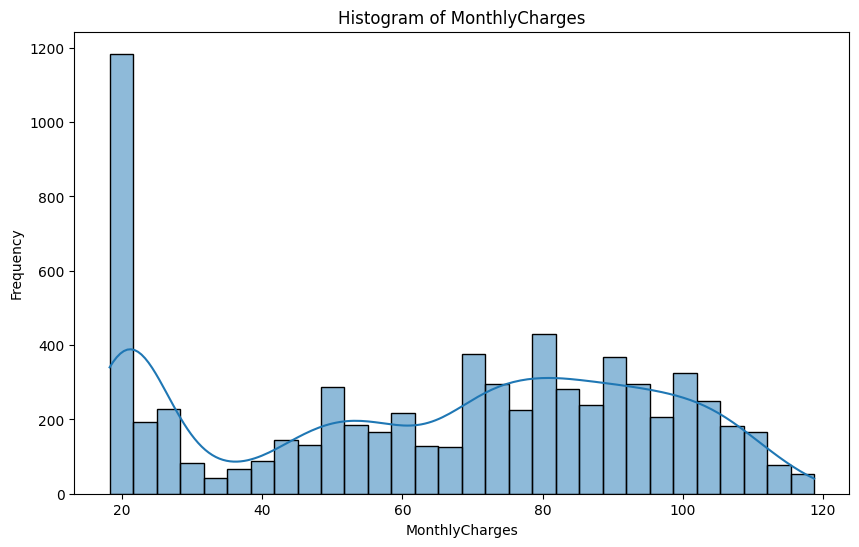

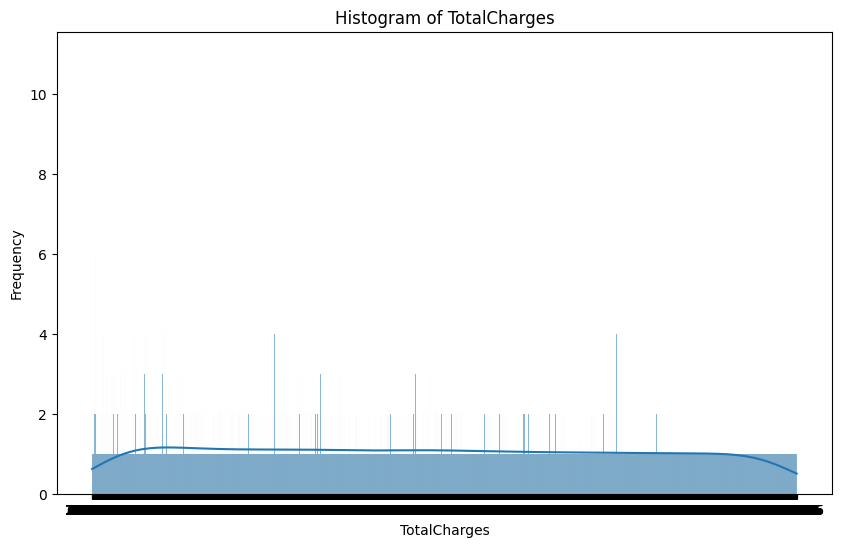

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

BIVARIATE ANALYSIS

Bivariate analysis examines the relationship between two variables to determine correlations and causal relationships.

In [ ]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


GENDER COLUMN ANALYSIS

Gender column analysis involves examining the distribution and frequency of different gender categories within a dataset to identify patterns and disparities.

In [ ]:
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
Male      3555
Female    3488
Name: count, dtype: int64


Now, let's calculate the frequency of the gender who has churned(stoped using service).

GENDER VS CHURN

In [ ]:
churn_gender_count = df[df['Churn']=='Yes']['gender'].value_counts()
print(churn_gender_count)

gender
Female    939
Male      930
Name: count, dtype: int64


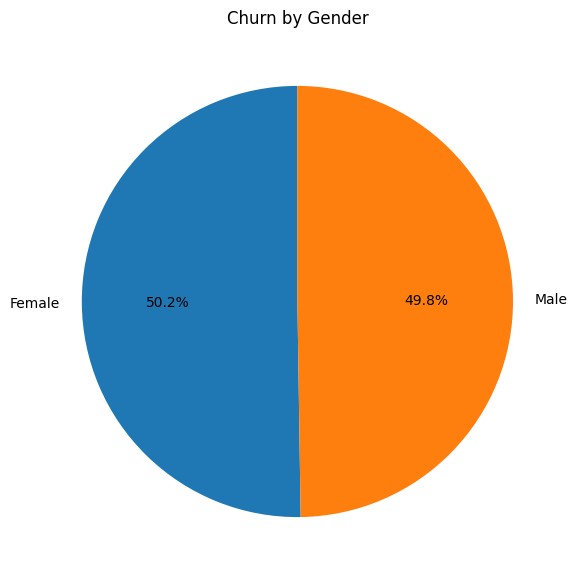

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(churn_gender_count, labels=churn_gender_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Churn by Gender')
plt.show()

Conclusion

1.   There is no significant difference in the number of male and female
     customers, perhaps there is no bias item
2.   So, no gender specific churn.




PAYMENT METHOD VS CHURN

OBJECTIVE: Assess if the payment method affects customer churn.

In [ ]:
print(df['PaymentMethod'].value_counts())


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


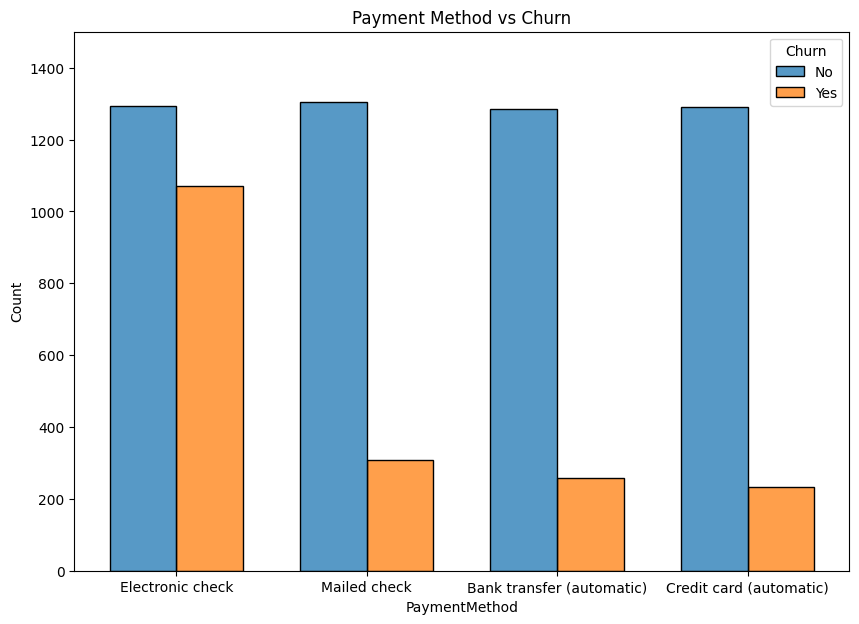

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='PaymentMethod',hue='Churn',multiple="dodge",shrink=.7)
plt.title('Payment Method vs Churn')
plt.ylim(0,1500)
plt.show()

CONCLUSION

1.  Electronic check payment method customers have higher churn.
2.  Mailed check payment method customers have lower churn.

SENIOR CITIZEN VS CHURN

In [ ]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


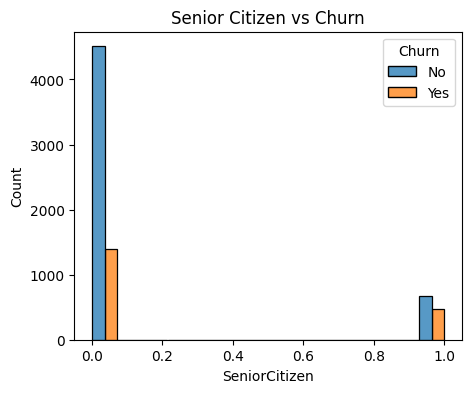

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='SeniorCitizen',hue='Churn',multiple="dodge",shrink=.999)
plt.title('Senior Citizen vs Churn')
plt.show()

Let's find the percentage of senior citizens who are churned and who are not.

In [ ]:
churned_seniors = df[df['SeniorCitizen']==1]['Churn'].value_counts()
print(churned_seniors)

Churn
No     666
Yes    476
Name: count, dtype: int64


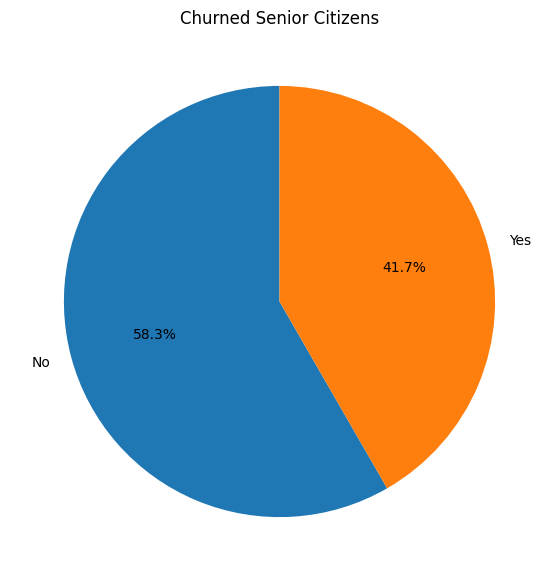

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(churned_seniors,labels=churned_seniors.index,autopct='%1.1f%%',startangle=90)
plt.title('Churned Senior Citizens')
plt.show()

CONCLUSION

1.   Almost 6 out 10 senior citizens continue to use the service.
2.   However, the churn rate for seniors is still considerable.The fact that over 40% of seniors churn indicates there might be specific factors affecting this group that need to be addressed.



BOXPLOT OF MONTHLY CHARGES BY CHURN

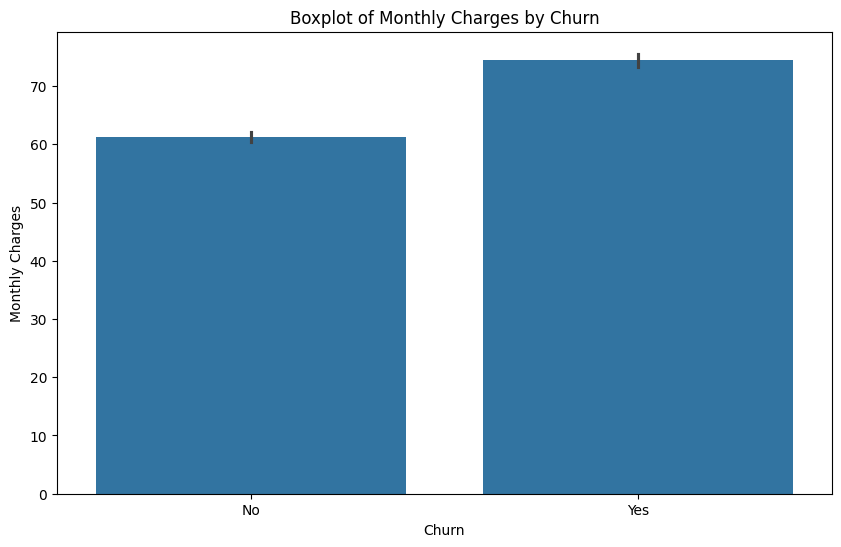

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

COUNT PLOT OF CHURN BY GENDER


Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


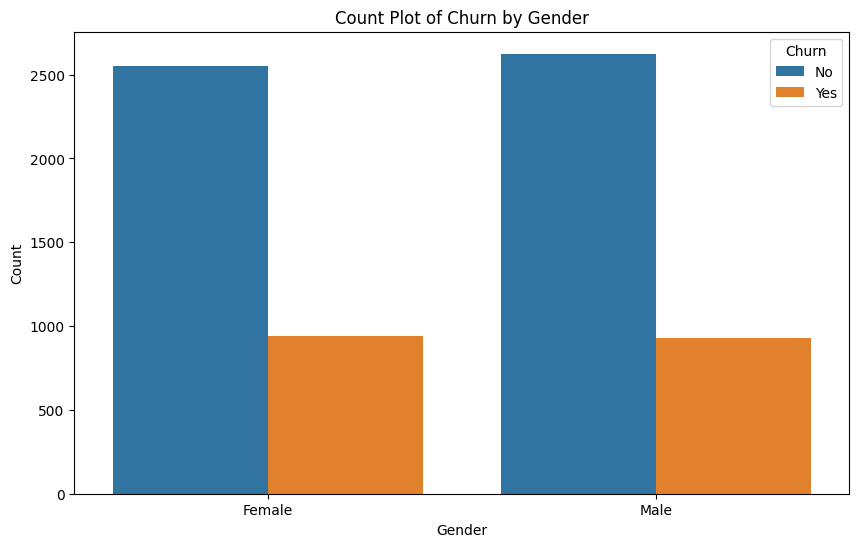

In [ ]:
cross_tab_gender_churn = pd.crosstab(df['gender'], df['Churn'])
print(cross_tab_gender_churn)

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Count Plot of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

SCATTERPLOT OF TENURE VS MONTHLY CHARGES AND SCATTERPLOT OF TENURE VS TOTAL CHARGES

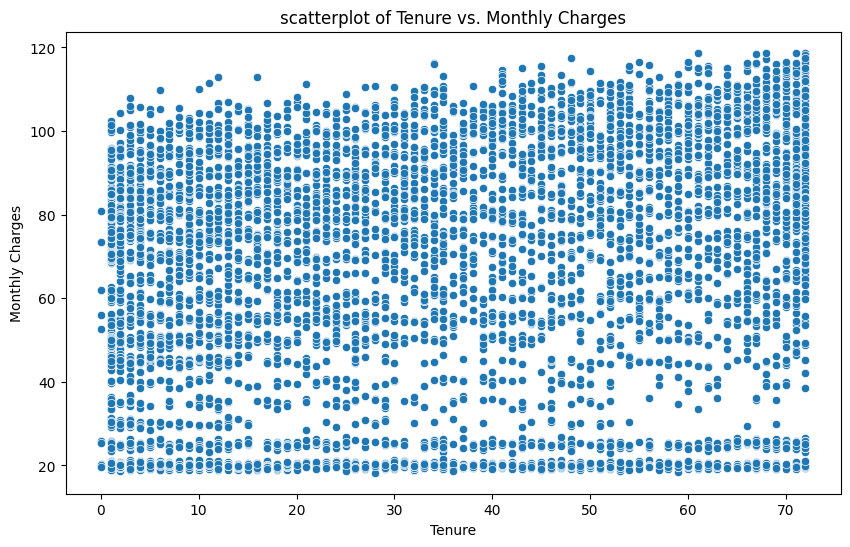

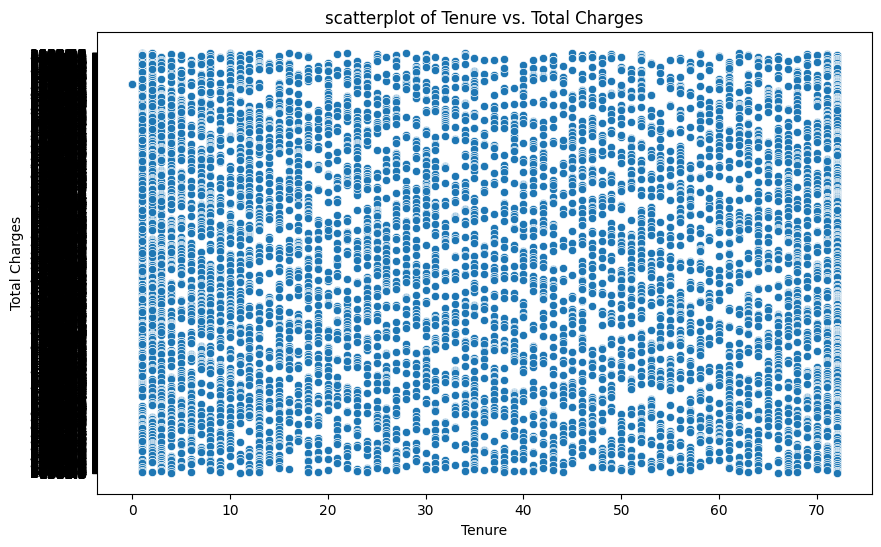

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Tenure vs. Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.title('scatterplot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Scatterplot of Tenure vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df)
plt.title('scatterplot of Tenure vs. Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

MULTIVAR ANALYSIS

Multivariate analysis allows you to find patterns between variables, helping you better understand the effects that different factors have on each other and the relationships between them. It represents a critical tool for marketers looking for ways to get deeper insight into the outcome of campaign decisions.


Tenure By Internet Service Type and Churn

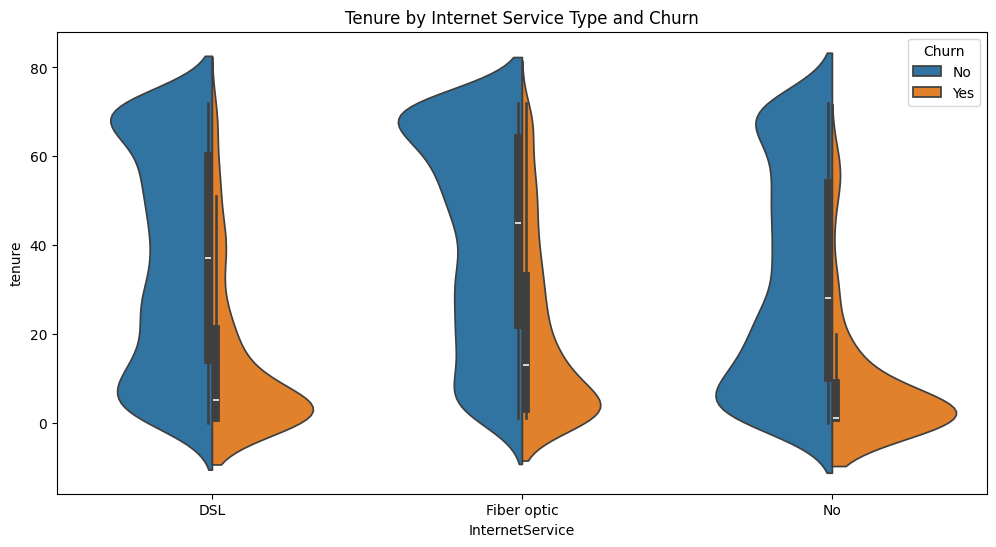

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='InternetService', y='tenure', hue='Churn', split=True, data=df)
plt.title('Tenure by Internet Service Type and Churn')
plt.show()

This plot shows the variation of MonthlyCharges across different Contract types, highlighting differences between customers who churned and those who did not. The violin plot provides a comparative view of the distribution and density of monthly charges. It illustrates how these charges might influence or be influenced by customer churn.

####Heatmap of gender vs churn



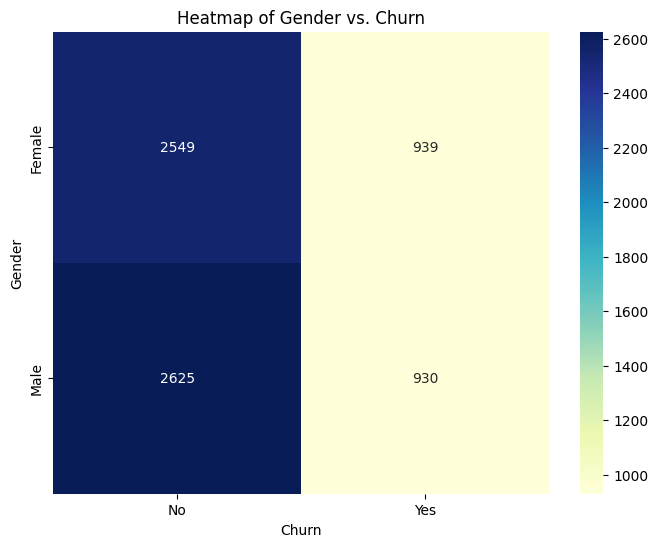

In [9]:
cross_tab_gender_churn = pd.crosstab(df['gender'], df['Churn'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_gender_churn, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Gender vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Gender')
plt.show()

The heatmap displays the counts of churned and non-churned customers for each gender, annotated with the respective counts. The color gradient, using the YlGnBu color map, indicates count ranges with lighter colors for lower counts and darker colors for higher counts. This visualization helps identify if one gender has a higher churn rate than the other.


####Monthly Charges by Contract Type and Churn


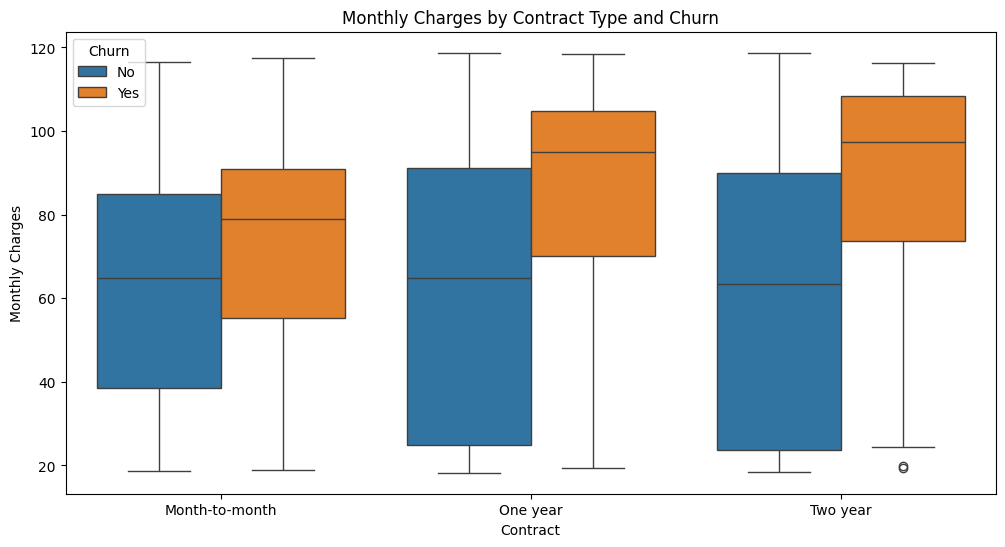

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()

The X-axis represents different contract types (e.g., Month-to-month, One year, Two year), and the Y-axis represents the monthly charges. Each box shows the distribution of monthly charges for each contract type, split by churn status (Yes and No), with the median as the central line. The box edges represent the interquartile range (IQR), while whiskers extend to 1.5 times the IQR, with points outside the whiskers considered outliers.